Importing the Libraries

In [109]:
import numpy as np
import scipy as sp
import math as m

# __Plots and calculations for Callibration of the  Lock in Amplifier__

An inverting amplifier is also used in order to amplify weak signals for the phase sensitive detection. The values of the resistances and other components used are:
- $R_f = 10k\Omega$
- $R_1 = 1k\Omega$
- $\pm V_{cc} = 6V$

The Amplification factor is calculated by the formula:
\begin{equation}
    \alpha = \frac{V_{out}}{V_{in}} = - \frac{R_f}{R_{in}}
\end{equation}

from the plot of $V_{out}$ vs $V_{in}$, we get the $\alpha$. For the callibration, the input of the opamp is obtained from the WG port of the SEELab which generates a Voltage of $3\sin{(2\pi f t)}$. it is then passed through a voltage divider circuit through a potentimeter of 2k resistance. The optput is then connected to the inverting amplifier.
The circuit Diagram for the Inverting Amplifier is shown below:


***<p style="text-align: center;">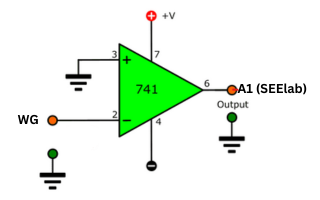</p>***

### Plotting the Curve

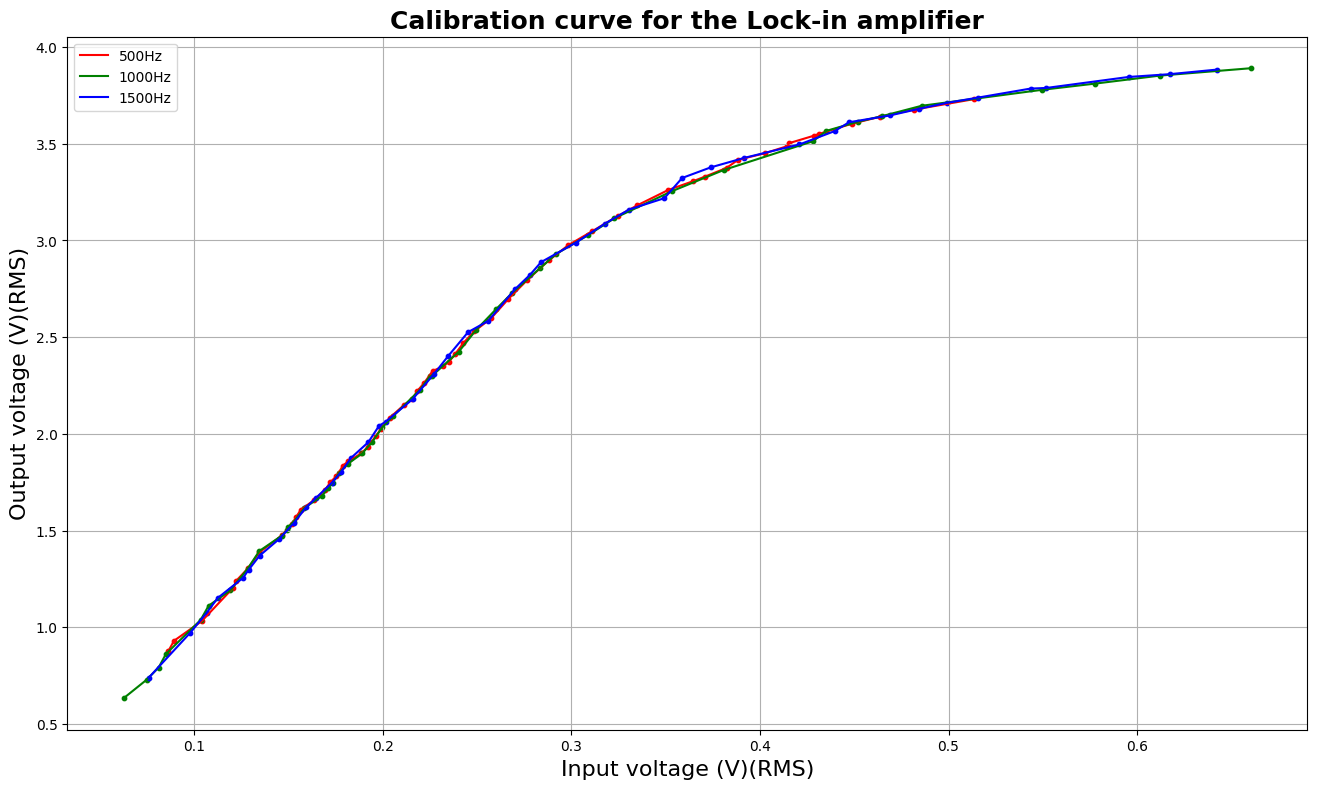

In [110]:
freq_list=[500,1000,1500]
color_list=['r','g','b']
########################################################################## 
data_dict_cal = {}
for freq in freq_list:
    x_points = f'xlist_{freq}'
    y_points = f'ylist_{freq}'
    fit_stuff= f'fit_{freq}'
    err_stuff= f'err_{freq}'
    data_dict_cal[x_points] = []
    data_dict_cal[y_points] = []
    data_dict_cal[fit_stuff] = []
    data_dict_cal[err_stuff] = []
########################################################################## 
import matplotlib.pyplot as plt_cal
fig_cal,cal = plt_cal.subplots(figsize=(16,9))
i=0
for f in freq_list:
    data=np.loadtxt(f"Data\\CAL_dat_{f}Hz.txt",usecols=(0,1))
    cal.plot(data[:,0],data[:,1],label=f"{f}Hz",color=color_list[i])
    cal.scatter(data[:,0],data[:,1],s=10,color=color_list[i])
    data_dict_cal[f'xlist_{f}'] = data[:,0]
    data_dict_cal[f'ylist_{f}'] = data[:,1]
    i+=1
##########################################################################     
plt_cal.xlabel("Input voltage (V)(RMS)", fontsize=16)
plt_cal.ylabel("Output voltage (V)(RMS)", fontsize=16)
plt_cal.title("Calibration curve for the Lock-in amplifier",fontweight='bold', fontsize=18)
plt_cal.legend()
plt_cal.grid()
plt_cal.show()
##########################################################################

### Calculating the Amplifiation Factor

For calculating the amplification factor, Only the linear part is selected for linear fitting

In [111]:
##########################################################################
xlimit=0.33
##########################################################################
for f in freq_list:
    index_to_rem = len(data_dict_cal[f'xlist_{f}'])-1
    while data_dict_cal[f'xlist_{f}'][index_to_rem] >= 0.33 and index_to_rem > 0:
            data_dict_cal[f'xlist_{f}'] = np.delete(data_dict_cal[f'xlist_{f}'],slice(index_to_rem + 1, None))
            data_dict_cal[f'ylist_{f}'] = np.delete(data_dict_cal[f'ylist_{f}'],slice(index_to_rem + 1, None))
            index_to_rem -=1
##########################################################################
for f in freq_list:
    data_dict_cal[f'fit_{f}'],data_dict_cal[f'err_{f}'] = np.polyfit(data_dict_cal[f'xlist_{f}'],data_dict_cal[f'ylist_{f}'],1,cov='True')

for f in freq_list:
    print(f"Slope_{f}=",data_dict_cal[f'fit_{f}'][0],u"\u00B1",data_dict_cal[f'err_{f}'][0][0])
    print(f"Intercept_{f}=",data_dict_cal[f'fit_{f}'][1],u"\u00B1",data_dict_cal[f'err_{f}'][1][1])
##########################################################################

Slope_500= 9.694038817628662 ± 0.009572267494994239
Intercept_500= 0.07793414526824634 ± 0.0004265149602320937
Slope_1000= 9.686887096375221 ± 0.015903629854337537
Intercept_1000= 0.06470617085350899 ± 0.0006433324625522528
Slope_1500= 9.849685024330988 ± 0.015175261846307955
Intercept_1500= 0.044157350928883225 ± 0.0006560339554269428


In [112]:
def lin_fit(slope,intercept,x):
    return slope*x + intercept

for f in freq_list:
    for i in range(len(data_dict_cal[f'xlist_{f}'])):
        

    